In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
from read_utils import load_one_param_file
from utils import DATA_DIR, FIRST_EXPERIMENT_CLASSES,\
    SESSION_NAME, SESSION_OBJECTS, SESSION_EVENTS, GLYPH_BOX, NORMAL, \
    START, END, LABEL, SESSION_LEN, SESSION_OBJ_2D

In [5]:
session_data = load_one_param_file(os.path.join( DATA_DIR, 'SlideToward', 'Session1', 'files.param'))

'NoneType' object has no attribute 'findall'


In [17]:
import visualizer
from importlib import reload

In [12]:
import session_utils
session_utils.project_to2d(session_data, from_frame = 0, to_frame = session_data[SESSION_LEN])

============ Stella Artois


D:\git\learn-to-perform\session_utils.py:49: RuntimeWarning: invalid value encountered in float_scalars
  return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))


============ table
============ Shell


In [27]:
session_utils.interpolate_multi_object_data(session_data, object_names = session_data[SESSION_OBJ_2D].keys())

In [29]:
session_data[SESSION_OBJ_2D].keys()

dict_keys(['Stella Artois', 'Shell'])

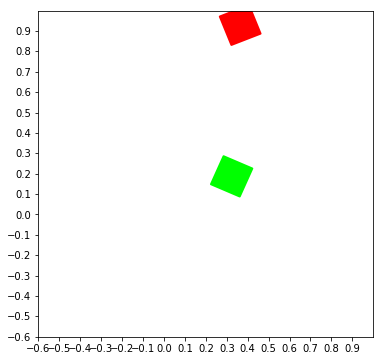

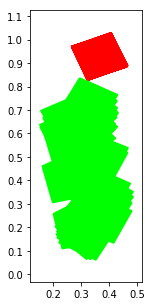

In [147]:
reload(visualizer)
visualizer.plot (session_data, 33, 74, 2, 5)

In [168]:
import pylab as pl
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import collections as mc

from_frame = 0
to_frame = 20
min_x = -1
max_x = 1
min_y =  -1
max_y = 1
show = True
colors = [ (1, 0, 0, 1), (0,1,0,1), (0,0,1,1), 
          (0.5, 0.5, 0, 1), (0,0.5, 0.5,1), (0.5, 0, 0.5,1),
         (0.7, 0.3, 0, 1), (0,0.7, 0.3,1), (0.7, 0, 0.3,1),
         (0.3, 0.7, 0, 1), (0,0.3, 0.7,1), (0.3, 0, 0.7,1)]
    
object_data = session_data[SESSION_OBJ_2D]
fig, ax = plt.subplots()
ax.set_xticks(np.arange(min_x, max_x, 0.1))
ax.set_yticks(np.arange(min_y, max_y, 0.1))
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])
fig.set_size_inches(6, 6)

ax.autoscale()
ax.margins(0.1)

# animation function.  This is called sequentially
def anim(i):
    lc = mc.PolyCollection([object_data[object_name][i + from_frame].get_markers() for object_name in object_data], 
                           edgecolors=[colors[j] for j in range(len(object_data))], 
                           facecolors=[colors[j] for j in range(len(object_data))], linewidths=[2,2])
    ax.clear()
    ax.set_xticks(np.arange(min_x, max_x, 0.1))
    ax.set_yticks(np.arange(min_y, max_y, 0.1))
    ax.set_xlim([min_x, max_x])
    ax.set_ylim([min_y, max_y])
    ax.add_collection(lc)
    return lc,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, anim,
                               frames=to_frame - from_frame, interval=20, blit=True)


anim.save("name.mp4", fps=10, extra_args=['-vcodec', 'libx264'])

In [172]:
reload(visualizer)
visualizer.animate(session_data , 33, 74, name = "slide_closer_1.mp4", min_x = -1, max_x = 1, min_y =  -1, max_y = 1,  )

<source src="data:video/mp4;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAAPVdtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1MiByMjg1MSBiYTI0ODk5IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNyAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAb0GWIhAAR//73iB8yy2n5OtdyEeetLq0fUO5GcV6kvf4gAAADABacmUP7YcdOWsNAAEKAAI2a3T/rbY+IBp+Lw1SLdvhYDq1e+MZNrKMUoZt3pwVbxGZnGIr/VmxHqK/AyBnnbxYeWF9BBrLNfSE8xuMch8HVV/HFX8l4osXVSmBjRUt5mQ9SGt/YfnehG/HA2UVoPbneMzBte2Ip8IJPPBb7YGVANW4pgC1M5VSjhb6gxEevfpBk/TH+1c7yMIWWia06YVJ9IhD3YrccUPzOkPB45tS6OS8D1ehWKD4gaS5Mm6jiJjxNUJAmN1x+UpCYZkxkBPk11StA/RKnk5QjkG1UDY+VV81vs7A2eVYWoAQ15vBv1NFogh0IGWEkm5oWhAulhmYVZ8Q8y/7hHcCxCGLZec242NoFxN1owag5vOG4EUMlTzFDFkOs7Wn8oOIB4bMNMLVzv+N2pIqQ2zm3sSdPYKdTC4DoA/GNkU+vD/53ZjOe/MhVpg0w44Wt3aFe2yqLqIaBfFFPMukAlgOSF8YkO8pj5DxAucUsNal6cG1Z7qrsNFPVY6rPxL7RJqPpYEBA/IYUhPR9gAGsXLqY2r0IzuGMs1b3Eeg+b2pnbI/HbPVaaj99IRUSxuJFlpx0kkTMGab3z5EOhFiNBTwqKcsTxoGX1fGH7MtpL4pkBvpfgAvOA03YXNs5DwvGl78xhX+QjEv0N6vLyXtwTWe5q6vXfXTXRSORrc/9CJppNLLqz2UTzhOqTRZTsxHluK9rowffGt4objjW+SZQlRWnMjsH6/RsU9rGlusegd2uuI2fcw2T9iD9HX4MH0HEYFLZQ4YEsde1rEo8j44Jv/3SWBXQZ3C7lCLHJdBuBOkBTzizaTsZbHbGIUDzL7bVCFXcuUESe+29c4XmPiB9awZdhgLAor8an1gzzrPy8xUxbWPjm/3fkESTwWN5GcGW8gWdxyOJ9JuBf7rl44quIS5jb8Fn7vs3F5+0BaLfF4drV3hIXF1mPYmmGjxDf1TmzXKaU8aCBMYgTwHyhbYLmwd/x/a05m/i7F8wD5fWlGx1STgJakF+yeEu7kOBmwtbXB04hzVJzoWWMPjXfhIqr7fAkeKqedZSXAoYLlpLuqFJvN5CK9O8Yi2fnsOoKdmtdHmI0vf1h6Lj1SQs9Ruy+Ly1aJ8Xc/37Bf184x0+gBoAW4PLoHCX+C5Af5/aGyGZwcM838HuLjNhilR3R0ytQghfBCgDwUr/MH/F5+kn4dfR4nvj7GZvw7dfOc6luYKBqvyIG+7f+2Hm2PvyhWMQWtRKJaBRqJqzwf88CETrqeLmu+59Y+PwNpMfgPhSCM2aOH7v6/TtQikPjjvUeJ4Eg+Vh7Yz89zkbU+OOpnFxK8j1EHUVxPv6bd2cx4HMU9125KARDlzGdV9B3j64KzINXa2OgdOkBRouiKW4OFQ03ECErVMCyJFcypNY+sHYR3Av5CWqVBpTymkt9mCgar8kESXhPsH5tjr9O3eMFrUSlekgr6Se0Y0535Frf3pdEPlOTgwE9+XJXujpzCaVZhfsaj51G8G+1FCPAoQV9Ev/YC6vcDWxNcPAPtASmTW1qG+1vRPTof9a/7DxkOIo/5J30fU1TiIJ8LUn/QuIdirzvAc+NePxijbjyQGO5IQCcesYFZnvpUM5gpEH6hg7RKzMZnC0kB/009knibnX6vbLbmxikjGdxxue6G4lb/w8d0iGeKFeCnpxRM1+FOy3WhVQWIRA6tiyEMWh+0KPGvdaz9zlqOxeleBAJniWEvJMBJks60g05n5GMPKGhvxhS74TvVisgrmmZhaTqrWqpvhzTIr5Fya1mu+ZennP+zdlo8fpAhMmqM9cifLjAiV7DSSy82lIwWUHY/k9ihWhS/15nRo/+WYDzI1ic8HvnhH3KbSX2QYWiUjVZqRoYciexFzOzmHvhFRInD5HAg0KwwH7PjEdzYdFgLcJJRJpgh6RTInQQNzOAXbHIXbL1d/0pWp6+pXfWWY/UXH02d9vUN/OyndtkvJi4rVL3U++/MAb+Qa8vmQVDVTi0UByuSaodf9Y3uUTXcNDiJVVqdhns/2yAcWLHZ34Hvu+++XWb4zmGf7QcEGAgup+o6jcDLBChYVkfEXRocjssH8w//LA6u0MInu2P3Ns+OEysV39WgqxAdymsh4GrosTx0/aV8Po5EaAUQqhDTVE55ssBRr09/OOVBgD6JKgIfxBwtAAAizh1ucQDWyZO5VRKu/gEtYZJkUYnaAvnqHolywLYnAqeHooU8XVQY1638pykk3D+G0THZCIUrKG9rXIjgiPexW3kn0m4jeFX/70qOKxQDOTVjO3asxOd08v4OsFj8Uer4IQipSQZck6q/qCECajhI6Cm5mTW/KXMpbTt6YRaP7HZPGvwTOuoMEC/9ynyXV2qgP0yB1mfCj9mU1/ILB9UwG8O9WpHTUnOK/XJVlUOHE+VHvIvYFzQNo4VMoed0rKuK6VrenE3FtDodM8wdvwyU12etmcxvGAH8zIXbd/tJt7ZNyyJmPv22mCQfYjXSbr4z8lGDKCkH+dV1oaH81LgiXQr8YEPxSe9If1wQMwBP5994aCExoRx+PcRprcS0Aqi5uGx73eQSlop/lKYtdE4/CYUv+6d8aUD9q6bt/s2Ye0K20aNW6MTl4lHWeosA5sIyOaJmipCnwsnXjqXSl8SpgUSkQxds79S7AYdm2weOSVyTPFLOIKCLxijwzCNG2b+lPq4P144N/RrkpcEEKXHAcHmU8qSob2aBtKReEsk5eU8zIdfI6heNyjIopybXAlmYRrzG5+GZsPiTNOMQgV1FKMKfqia+ovofwAy/KN6xD0hTL/7ZNfJO3hPvvP8TD21Hsvee6HG+cDHOWCgLnYDlEhtmgc+186MRY9xyoUQXoPnlcIoiUiRL0jgKovw+Iml+rXqcie1FNr4XrPZJLN5arHtcBZSEKVFKJ0jNaA6Bxmp

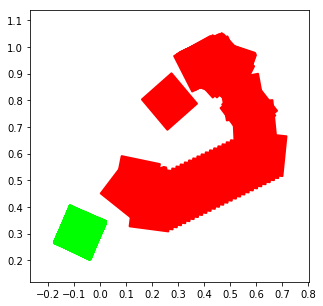

In [35]:
visualizer.plot (session_data, 325, 407, 5, 5)

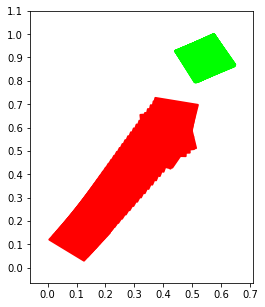

In [54]:
visualizer.plot (session_data, 712, 753, 4, 5)

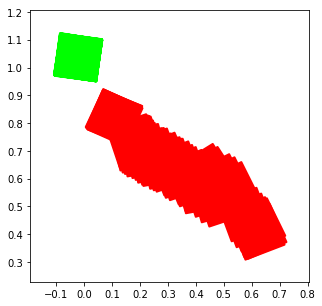

In [37]:
visualizer.plot (session_data, 1012, 1060, 5, 5)

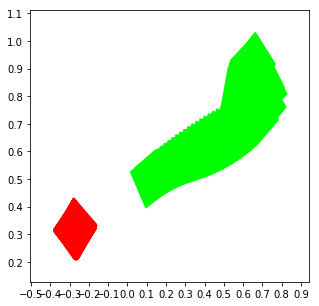

In [38]:
visualizer.plot (session_data, 1321, 1376, 5, 5)

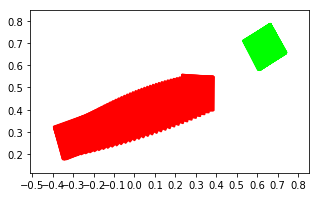

In [49]:
visualizer.plot (session_data, 1617, 1667, 5, 3)

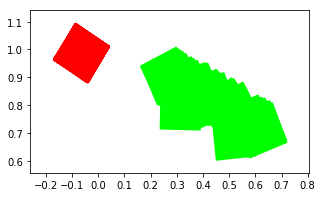

In [50]:
visualizer.plot (session_data, 1876, 1907, 5, 3)

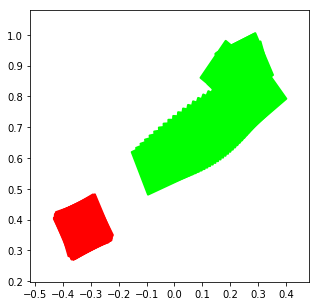

In [41]:
visualizer.plot (session_data, 2127, 2161, 5, 5)

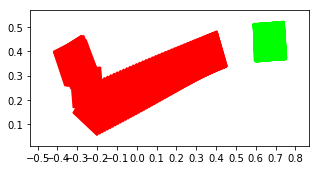

In [51]:
visualizer.plot (session_data, 2329, 2385, 5, 2.5)

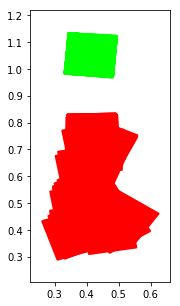

In [52]:
visualizer.plot (session_data, 2557, 2590, 2.5, 5)

In [59]:
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
import project
from project import Project

In [123]:
p = project.Project.load("../slidetoward_project.proj")

In [124]:
p[0]

{'session_events': [{'end': 37,
   'label': ['Shell', 'Stella Artois'],
   'start': 16},
  {'end': 203, 'label': ['Stella Artois', 'Shell'], 'start': 162},
  {'end': 376, 'label': ['Stella Artois', 'Shell'], 'start': 356},
  {'end': 530, 'label': ['Stella Artois', 'Shell'], 'start': 506},
  {'end': 688, 'label': ['Shell', 'Stella Artois'], 'start': 660},
  {'end': 833, 'label': ['Stella Artois', 'Shell'], 'start': 808},
  {'end': 953, 'label': ['Shell', 'Stella Artois'], 'start': 938},
  {'end': 1080, 'label': ['Shell', 'Stella Artois'], 'start': 1063},
  {'end': 1192, 'label': ['Stella Artois', 'Shell'], 'start': 1164},
  {'end': 1295, 'label': ['Stella Artois', 'Shell'], 'start': 1278}],
 'session_feature': array([[ 0.,  0.,  0., ...,  0.,  0.,  1.],
        [ 0.,  0.,  1., ..., -1.,  1.,  1.],
        [ 0.,  0., -1., ...,  0.,  0.,  1.],
        ..., 
        [ 0.,  0.,  0., ..., -1.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]

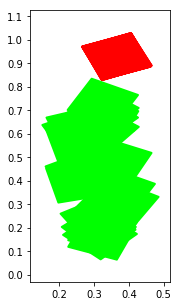

In [62]:
visualizer.plot (p[0], 16, 37, 2.5, 5)

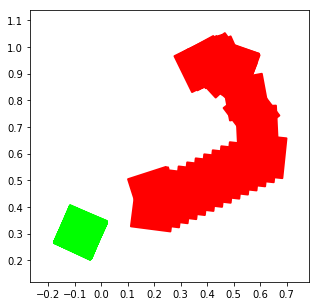

In [66]:
visualizer.plot (p[0], 162, 203, 5, 5)

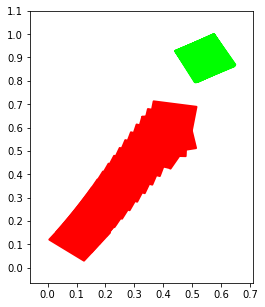

In [67]:
visualizer.plot (p[0], 356, 376, 4, 5)

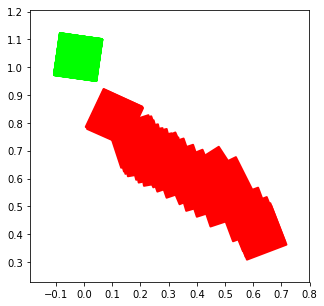

In [68]:
visualizer.plot (p[0], 506, 530, 5, 5)

In [70]:
p[1]['session_events']

[{'end': 57, 'label': ['Shell', 'Stella Artois'], 'start': 25},
 {'end': 149, 'label': ['Shell', 'Stella Artois'], 'start': 133},
 {'end': 250, 'label': ['Stella Artois', 'Shell'], 'start': 230},
 {'end': 353, 'label': ['Shell', 'Stella Artois'], 'start': 319},
 {'end': 437, 'label': ['Stella Artois', 'Shell'], 'start': 419},
 {'end': 518, 'label': ['Shell', 'Stella Artois'], 'start': 489},
 {'end': 620, 'label': ['Stella Artois', 'Shell'], 'start': 593},
 {'end': 718, 'label': ['Stella Artois', 'Shell'], 'start': 690},
 {'end': 809, 'label': ['Shell', 'Stella Artois'], 'start': 789},
 {'end': 892, 'label': ['Stella Artois', 'Shell'], 'start': 874},
 {'end': 973, 'label': ['Shell', 'Stella Artois'], 'start': 952}]

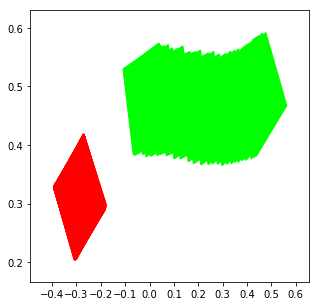

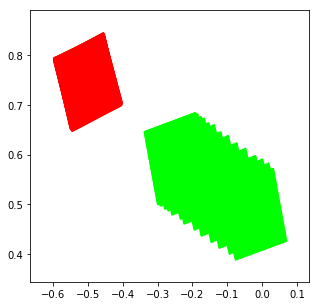

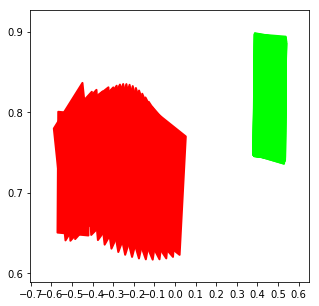

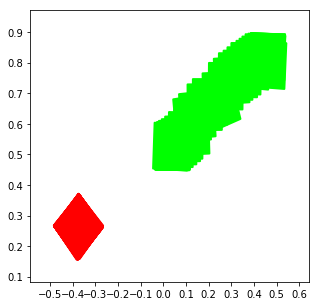

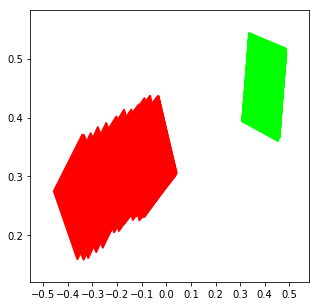

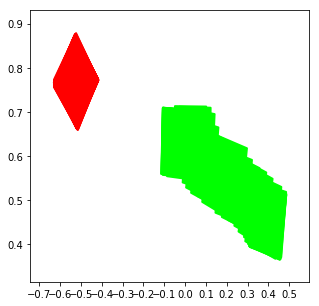

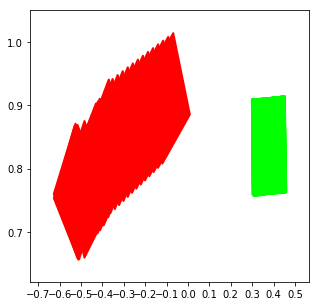

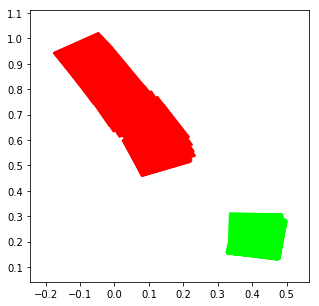

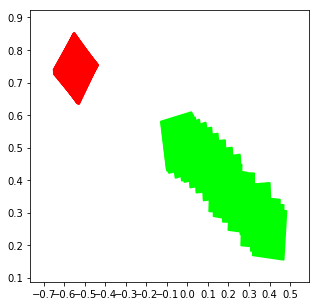

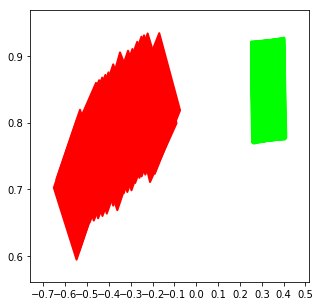

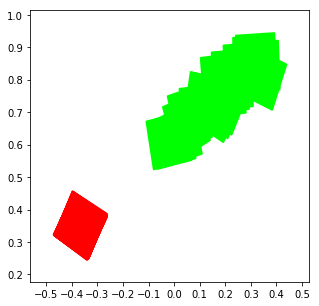

In [71]:
for thing in p[1]['session_events']:
    visualizer.plot (p[1], thing[START], thing[END], 5, 5) 

In [122]:
for thing in p[0]['session_events']: 
    print (p[0]['session_feature'][thing[START]:thing[END]][:,2])

TypeError: list indices must be integers or slices, not tuple

In [74]:
import feature_utils
feature_utils.qsr_feature_extractor(p[0],  get_location_objects = feature_utils.get_location_objects_most_active)

13

In [127]:
p[0]['session_feature'][0:100]

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  0. , -1. ,  1. ,  1. ],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  0. , -1. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. , -1. ,  1. ,  0. ,  0. ,  1. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. , -1. ,  0.5],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  1. ,  1. ],
       [ 0. , -1. , -1. ,  0. ,  0. , -1. ,  0.5],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  1. ,  1. ],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  1. ,  1. ],
       [ 0. ,  0. , -1. ,  0. ,  0. , -1. ,  0.5],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  1. ,  1. ],
       [ 0. ,  0. , -1. ,  0. ,  0. , -1. ,  1. ],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  1. , -1. ],
       [ 0. , -1. , -1. ,  0. ,  0. ,  0. ,  1. ],
       [ 0. ,  1. ,  1. ,  1. , -1. ,  0. ,  1. ],
       [ 0. , -1. , -1. ,  0. ,

In [126]:
for i in range(162,204):
    print ('------ ' + str(i))
    print (p[0]['session_obj_2d']['Shell'][i].transform.rotation)
    print (p[0]['session_obj_2d']['Stella Artois'][i].transform.rotation)

------ 162
1.1679237962420541
0.45797003382901735
------ 163
1.1573593972737832
0.4981689141168757
------ 164
1.1505461657519929
0.45391306518111296
------ 165
1.1467899870521685
0.42256936854530514
------ 166
1.1606063415047942
0.28728694437142743
------ 167
1.1611176491367718
0.4590302890881821
------ 168
1.1573009622085735
0.40749731194136385
------ 169
1.1606911576539183
0.4145987431534104
------ 170
1.1604214954111747
0.6293730238100895
------ 171
1.1433840137195794
0.42153776201591764
------ 172
1.1574534290320417
0.866510821429515
------ 173
1.154315700152066
0.7475249058982145
------ 174
1.139283953563119
0.8841067655285184
------ 175
1.1434805312444851
1.0105974401956814
------ 176
1.1362698152415116
1.1972960478972037
------ 177
1.165223124919979
1.2172156695215244
------ 178
1.1613168200179067
1.2325092794249568
------ 179
1.1607105640042263
1.2060882831374231
------ 180
1.1430661725273805
1.2236460015525745
------ 181
1.1584395683661235
1.2524753109587046
------ 182
1.14374

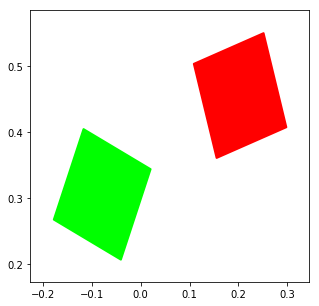

In [87]:
visualizer.plot (p[0], 201, 202, 5, 5)

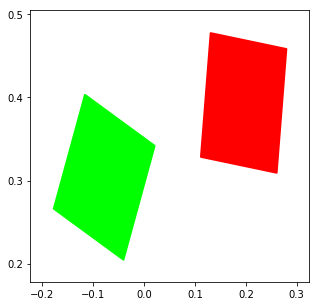

In [91]:
visualizer.plot (p[0], 200, 201, 5, 5)

In [92]:
import math

In [93]:
math.atan2(0.5, 1)

0.4636476090008061

In [112]:
a = np.array([[2,3],[4,5]])

In [113]:
t = a[:,1]

In [115]:
t[1] = 3

In [116]:
t

array([3, 3])

In [117]:
a

array([[2, 3],
       [4, 3]])

In [130]:
q = project.Project.load("../slidearound_project.proj")

In [131]:
q[0]['session_events']

[{'end': 33, 'label': ['Stella Artois', 'Shell'], 'start': 0},
 {'end': 67, 'label': ['Shell', 'Stella Artois'], 'start': 44},
 {'end': 119, 'label': ['Stella Artois', 'Shell'], 'start': 82},
 {'end': 156, 'label': ['Shell', 'Stella Artois'], 'start': 136},
 {'end': 189, 'label': ['Stella Artois', 'Shell'], 'start': 167},
 {'end': 214, 'label': ['Shell', 'Stella Artois'], 'start': 197},
 {'end': 243, 'label': ['Stella Artois', 'Shell'], 'start': 224},
 {'end': 278, 'label': ['Shell', 'Stella Artois'], 'start': 254},
 {'end': 308, 'label': ['Stella Artois', 'Shell'], 'start': 288},
 {'end': 340, 'label': ['Shell', 'Stella Artois'], 'start': 319},
 {'end': 367, 'label': ['Shell', 'Stella Artois'], 'start': 352},
 {'end': 396, 'label': ['Stella Artois', 'Shell'], 'start': 381},
 {'end': 418, 'label': ['Stella Artois', 'Shell'], 'start': 404},
 {'end': 445, 'label': ['Shell', 'Stella Artois'], 'start': 427},
 {'end': 468, 'label': ['Stella Artois', 'Shell'], 'start': 450},
 {'end': 491, 'l

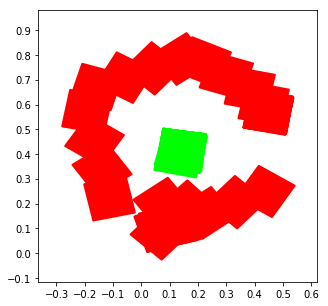

In [133]:
visualizer.plot (q[0], 0, 33, 5, 5)

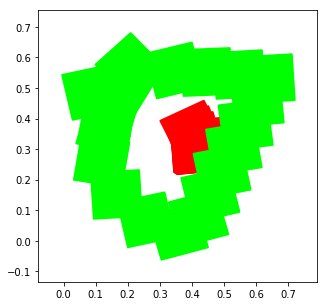

In [134]:
visualizer.plot (q[0], 44, 67, 5, 5)

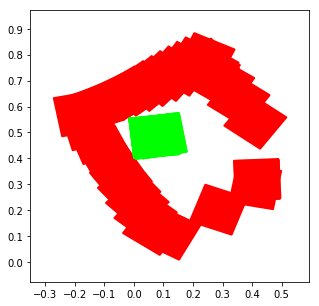

In [135]:
visualizer.plot (q[0], 82, 119, 5, 5)

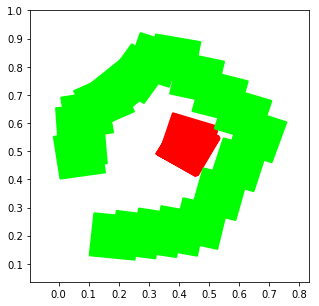

In [136]:
visualizer.plot (q[0], 136, 156, 5, 5)

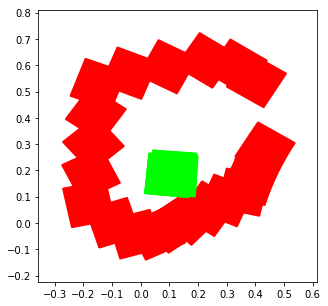

In [137]:
visualizer.plot (q[0], 167, 189, 5, 5)

In [138]:
q[0]['session_feature'][167:189]

array([[ 0. ,  0. , -1. ,  0. ,  1. ,  0. , -0.5],
       [ 0. ,  0. , -1. , -1. ,  1. ,  0. , -0.5],
       [-7. , -1. , -1. ,  0. ,  1. ,  0. , -0.5],
       [ 0. ,  0. , -1. ,  1. ,  1. ,  0. , -0.5],
       [ 0. ,  0. , -1. , -1. ,  1. ,  0. ,  0. ],
       [ 1. ,  0. ,  1. ,  1. ,  1. , -1. ,  0. ],
       [ 0. , -1. , -1. ,  1. ,  1. ,  0. , -0.5],
       [ 0. , -1. , -1. , -1. ,  1. ,  0. , -1. ],
       [ 1. ,  0. , -1. ,  0. ,  1. ,  0. , -1. ],
       [ 0. ,  1. ,  1. ,  1. ,  1. ,  1. ,  0. ],
       [ 1. , -1. , -1. ,  0. ,  1. , -1. ,  0. ],
       [ 0. ,  0. , -1. ,  1. ,  1. ,  1. ,  0. ],
       [ 1. ,  0. , -1. ,  1. ,  1. ,  1. , -1. ],
       [ 0. , -1. , -1. ,  0. ,  1. ,  1. , -1. ],
       [ 0. ,  0. , -1. ,  1. ,  1. ,  0. , -0.5],
       [ 1. ,  0. , -1. , -1. ,  1. ,  0. , -0.5],
       [ 0. ,  0. ,  1. ,  1. ,  1. , -1. , -0.5],
       [ 1. ,  1. ,  1. , -1. ,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  1. ,  1. , -1. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,

In [139]:
q[0]['session_feature'][136:156]

array([[ 0. ,  0. ,  1. ,  0. , -1. ,  0. , -1. ],
       [ 0. ,  0. , -1. ,  0. , -1. ,  0. , -1. ],
       [ 0. ,  0. ,  1. ,  0. , -1. , -1. , -1. ],
       [ 0. ,  0. , -1. ,  0. , -1. ,  1. , -1. ],
       [-1. ,  0. , -1. , -1. , -1. ,  1. , -0.5],
       [ 0. , -1. , -1. , -1. , -1. ,  1. , -0.5],
       [ 0. ,  0. , -1. , -1. , -1. ,  1. , -0.5],
       [-1. ,  1. ,  1. ,  1. , -1. , -1. ,  0.5],
       [ 0. ,  0. , -1. ,  0. , -1. , -1. ,  0.5],
       [ 0. , -1. , -1. ,  0. , -1. ,  1. ,  0.5],
       [ 7. , -1. , -1. , -1. , -1. ,  0. ,  0.5],
       [ 0. ,  0. , -1. ,  1. , -1. ,  0. ,  0.5],
       [-1. ,  1. ,  1. ,  0. , -1. , -1. ,  0.5],
       [ 0. , -1. , -1. ,  0. , -1. ,  1. ,  0.5],
       [-1. ,  0. , -1. ,  0. , -1. , -1. ,  0.5],
       [-1. ,  1. ,  1. ,  0. , -1. ,  1. ,  0.5],
       [ 0. ,  1. ,  1. , -1. , -1. ,  0. ,  0.5],
       [ 0. ,  0. ,  1. ,  0. , -1. ,  0. ,  0.5],
       [-1. ,  0. ,  1. ,  1. , -1. ,  0. ,  0.5],
       [ 0. ,  1. ,  1. ,  0. ,

In [141]:
q[0]['session_feature'][136:156][:,1]

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0., -1., -1.,  0.,  1.,
       -1.,  0.,  1.,  1.,  0.,  0.,  1.])

In [142]:
np.ceil(3/2)

2.0

In [144]:
a = np.array([[1,2],[2,3]])

In [145]:
np.concatenate([a,a])

array([[1, 2],
       [2, 3],
       [1, 2],
       [2, 3]])